# Image classification for 3 classes : ['computer', 'imprimante', 'smartphones']

##         Import modeles and functions that will be used

In [1]:
#####################################################################################
# Import necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np 
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback, EarlyStopping,ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
import tensorflowjs as tfjs
import sys

In [3]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input
#preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [4]:
#from keras.applications import MobileNet, MobileNetV2
import itertools 
from keras.models import Sequential
from keras.layers import  Dropout, MaxPool2D
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping
from tensorflow.keras import layers

In [5]:
# function to plot the results of the model
def show_results() :
    #Plot the Graph
    # Loss Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
    # Accuracy Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['accuracy'],'r',linewidth=3.0)
    plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)

In [6]:
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
##################################################################################################


In [7]:
#functions to show_image and make_predictions
def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

## Data augmentation 
#### ImageDataGenerator that Loads Images and Performs Image Augmentation
The ImageDataGenerator will be able automatically detect the different classes in our dataset from the folder structure that was setup in the previous section. 
The ImageDataGenerator will then take each of these images and apply transformations (such as rotations) as to augment our image dataset. 
After this, the data will be ready to be fed to a machine learning model.

In [8]:
# create a data generator
datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.15, # Randomly zoom image 
        width_shift_range=0.05,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.05,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False ,# don't flip vertically
        validation_split=0.2) 

## Import the Data


In [9]:
train=datagen.flow_from_directory("dataframe",  
                                    target_size=(224, 224), 
                                    color_mode='rgb',
                                    shuffle=True,
                                    seed=42,
                                    class_mode='categorical', 
                                    batch_size=32, 
                                    subset="training"
)
validation=datagen.flow_from_directory("dataframe",  
                                    target_size=(224, 224), 
                                    shuffle=True,
                                    seed=42,
                                    color_mode='rgb', 
                                    class_mode='categorical', 
                                    batch_size=8,
                                    subset='validation'
)

Found 353 images belonging to 3 classes.
Found 87 images belonging to 3 classes.


In [35]:
test=datagen.flow_from_directory("testset",  
                                    target_size=(224, 224), 
                                    color_mode='rgb',
                                seed=42,
                                    class_mode='categorical', 
                                   
                                   
)

Found 86 images belonging to 3 classes.


### class_names

In [11]:
class_names = list(train.class_indices.keys())
class_names

['computer', 'imprimante', 'smartphones']

### result of datagenration
Let us look some random images of our dataset.

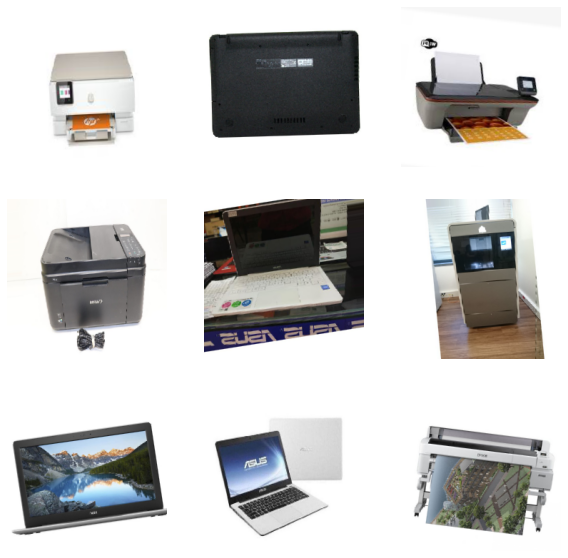

In [12]:
image_batch, label_batch = next(iter(train))

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  label = label_batch[i]
  plt.axis("off")
    

## Download the pretrained model

### VGG16 :

In [16]:
#base_model = keras.applications.VGG16(
#    weights='imagenet',  # Load weights pre-trained on ImageNet.
 #   input_shape=(224, 224, 3),
 #   include_top=False)

In [17]:
#base_model.summary()

### Resnet101 :

In [13]:
base_model = tf.keras.applications.resnet.ResNet101(
    include_top=False,
    weights='imagenet',
   input_shape=(224, 224, 3),
   classes=3,
)

### Resnet50 :

In [15]:
base_model = tf.keras.applications.resnet.ResNet50(
   include_top=False,
   weights='imagenet',
   input_shape=(224, 224, 3),
  classes=3,
)
    

## Adding new layers + freezing layers
We use freezing to avoid destroying any of the information they contain during future training rounds.

In [14]:
base_model.trainable = False#freezing

inputs = keras.Input(shape=(224, 224, 3))

# Separately from setting trainable on the model, we set training to False 
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1100, activation="relu")(x)
x = keras.layers.Dense(1100, activation="relu")(x)
x = keras.layers.Dense(1100, activation="relu")(x)
x = keras.layers.Dense(550, activation ="relu")(x)

# A Dense classifier with a multiclass classification 
outputs = Dense(3, activation='softmax')(x)
model = keras.Model(inputs, outputs)

In [15]:
model.summary() 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet101 (Functional)      (None, 7, 7, 2048)        42658176  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1100)              2253900   
                                                                 
 dense_1 (Dense)             (None, 1100)              1211100   
                                                                 
 dense_2 (Dense)             (None, 1100)              1211100   
                                                             

## Compile the model
It's critical to use a very low learning rate at this stage, because you are training a much larger model than in the first round of training, on a dataset that is typically very small. As a result, you are at risk of overfitting very quickly if you apply large weight updates. Here, you only want to readapt the pretrained weights in an incremental way.

In [16]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss= tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

## callback
Callbacks are used in Tensorflow to allow user intervention during model training.

In [17]:
my_callbacks  =tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                             min_delta=1e-3, patience=10)

In [23]:
## pour resnet50
#lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
#early_stopper = EarlyStopping(min_delta=0.001, patience=10)


## Fit the model

In [19]:
history = model.fit(train,
          validation_data=validation,
        epochs=20)

Epoch 1/20
12/12 [==============================] - 44s 4s/step - loss: 0.3349 - accuracy: 0.9122 - val_loss: 0.1074 - val_accuracy: 0.9885
Epoch 2/20
12/12 [==============================] - 43s 4s/step - loss: 0.1806 - accuracy: 0.9178 - val_loss: 0.1127 - val_accuracy: 0.9655
Epoch 3/20
12/12 [==============================] - 48s 4s/step - loss: 0.0939 - accuracy: 0.9632 - val_loss: 0.0643 - val_accuracy: 0.9655
Epoch 4/20
12/12 [==============================] - 46s 4s/step - loss: 0.0372 - accuracy: 0.9887 - val_loss: 0.0262 - val_accuracy: 0.9885
Epoch 5/20
12/12 [==============================] - 41s 3s/step - loss: 0.0262 - accuracy: 0.9915 - val_loss: 0.0313 - val_accuracy: 0.9885
Epoch 6/20
12/12 [==============================] - 42s 4s/step - loss: 0.0152 - accuracy: 0.9972 - val_loss: 0.0429 - val_accuracy: 0.9885
Epoch 7/20
12/12 [==============================] - 49s 4s/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.0318 - val_accuracy: 0.9885
Epoch 8/20
12/12 [==

In [20]:
for i, layer in enumerate(model.layers):
      print(i, layer.name)

0 input_2
1 resnet101
2 global_average_pooling2d
3 dense
4 dense_1
5 dense_2
6 dense_3
7 dense_4


## fine-tuning the model
which consists of unfreezing the entire model you obtained above (or part of it), and re-training it on the new data with a very low learning rate. This can potentially achieve meaningful improvements, by incrementally adapting the pretrained features to the new data

In [21]:
base_model.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100



Number of layers in the base model:  345


In [22]:
# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
      layer.trainable = False
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

fine_tune_epochs = 20
total_epochs =  20 + fine_tune_epochs


In [24]:
history_fine = model.fit(train,
                         epochs=total_epochs,
                         callbacks=my_callbacks,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation,)

Epoch 20/40
12/12 [==============================] - 119s 8s/step - loss: 0.0130 - accuracy: 0.9943 - val_loss: 0.0145 - val_accuracy: 0.9885
Epoch 21/40
12/12 [==============================] - 101s 8s/step - loss: 0.0037 - accuracy: 0.9972 - val_loss: 0.1341 - val_accuracy: 0.9425
Epoch 22/40
12/12 [==============================] - 96s 8s/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0148 - val_accuracy: 0.9885
Epoch 23/40
12/12 [==============================] - 97s 8s/step - loss: 1.3849e-04 - accuracy: 1.0000 - val_loss: 0.0635 - val_accuracy: 0.9885
Epoch 24/40
12/12 [==============================] - 95s 8s/step - loss: 2.7733e-04 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 25/40
12/12 [==============================] - 93s 8s/step - loss: 0.0267 - accuracy: 0.9915 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 26/40
12/12 [==============================] - 100s 9s/step - loss: 0.0067 - accuracy: 0.9972 - val_loss: 0.0795 - val_accuracy: 0.9770
Ep

## Result

### result of VGG16 :

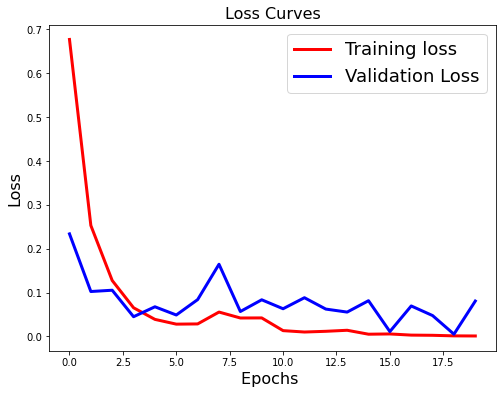

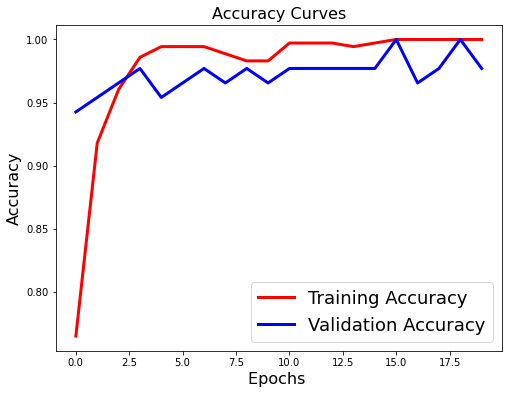

In [28]:
show_results()

In [35]:
#show results on test_dataset
test_score = model.evaluate(test)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

2/2 [==============================] - 5s 995ms/step - loss: 0.1405 - accuracy: 0.9524
[INFO] accuracy: 95.24%
[INFO] Loss:  0.1404617577791214


##### result of VGG16
VGG16v1 : loss: 1.4491 - accuracy: 0.5435    
Vgg16v2 : loss: 0.4560 - accuracy: 0.8810  
vgg16v3 : loss: 0.3271 - accuracy: 0.8409  
###### vgg16v4 : loss: 0.1405 - accuracy: 0.9524  


2/2 [==============================] - 5s 1s/step
Confusion Matrix
Normalized confusion matrix
Classification Report
              precision    recall  f1-score   support

    computer       0.44      0.44      0.44        18
  imprimante       0.36      0.29      0.32        14
 smartphones       0.23      0.30      0.26        10

    accuracy                           0.36        42
   macro avg       0.35      0.34      0.34        42
weighted avg       0.37      0.36      0.36        42



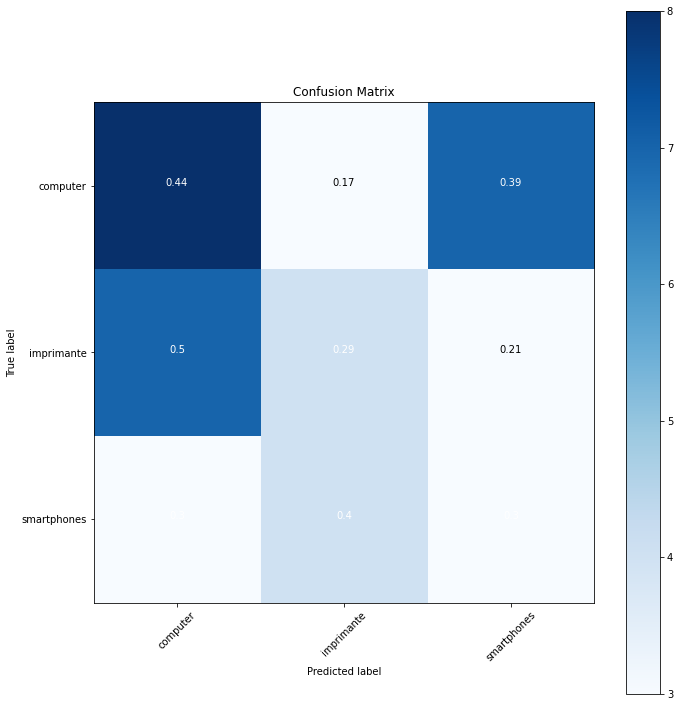

In [36]:
#Print the Target names
target_names = []
for key in train.class_indices:
    target_names.append(key)

# print(target_names)

#Confution Matrix 
Y_pred = model.predict(test)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

#Print Classification Report
print('Classification Report')
print(classification_report(test.classes, y_pred, target_names=target_names))

##### Recall = Given a class, will the classifier be able to detect it?
##### Precision = Given a class prediction from a classifier, how likely is it to be correct?
##### F1 Score = The harmonic mean of the recall and precision. Essentially, it punishes extreme values.

### result of restnet50

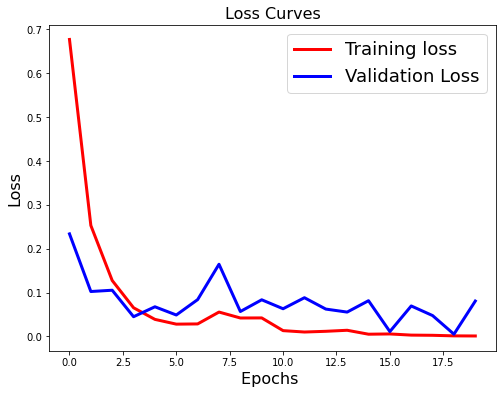

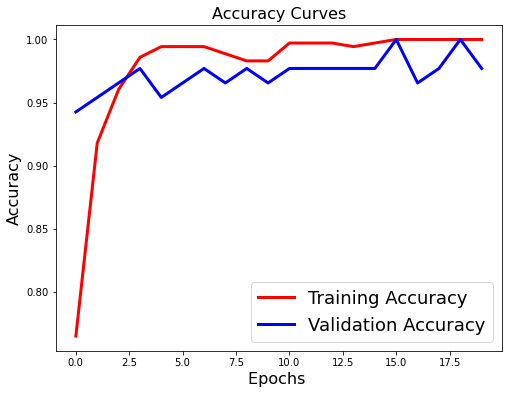

In [30]:
show_results()

In [31]:
test_score = model.evaluate(test)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

2/2 [==============================] - 3s 1s/step - loss: 0.1178 - accuracy: 0.9821
[INFO] accuracy: 98.21%
[INFO] Loss:  0.11779659986495972


##### result of resnet50   
version3 loss: 1.0481 - accuracy: 0.6538  
version3 loss: 0.8682 - accuracy: 0.6731  
version4 loss: 0.2415 - accuracy: 0.9048  
version5 loss: 0.4659 - accuracy: 0.8571  
version6 loss: 0.5750 - accuracy: 0.8571  
###### version7 loss: 0.1178 - accuracy: 0.9821  


2/2 [==============================] - 4s 1s/step
Confusion Matrix
Normalized confusion matrix
Classification Report
              precision    recall  f1-score   support

    computer       0.48      0.48      0.48        27
  imprimante       0.23      0.21      0.22        14
 smartphones       0.25      0.27      0.26        15

    accuracy                           0.36        56
   macro avg       0.32      0.32      0.32        56
weighted avg       0.36      0.36      0.36        56



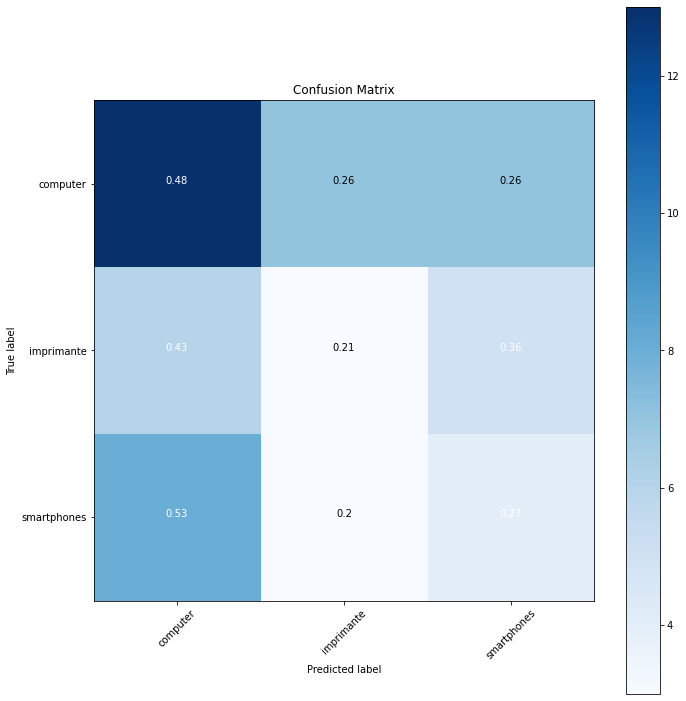

In [32]:
#Print the Target names
target_names = []
for key in train.class_indices:
    target_names.append(key)

# print(target_names)
#Confution Matrix 
Y_pred = model.predict(test)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

#Print Classification Report
print('Classification Report')
print(classification_report(test.classes, y_pred, target_names=target_names))

### result of resnet101

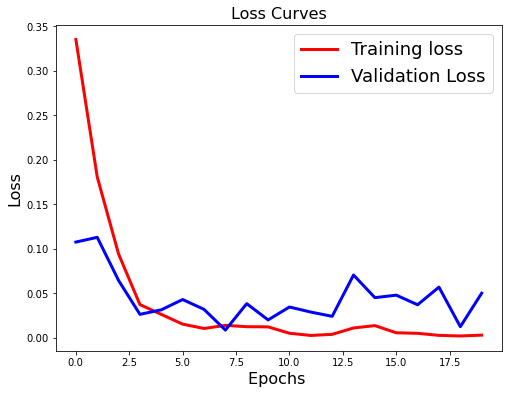

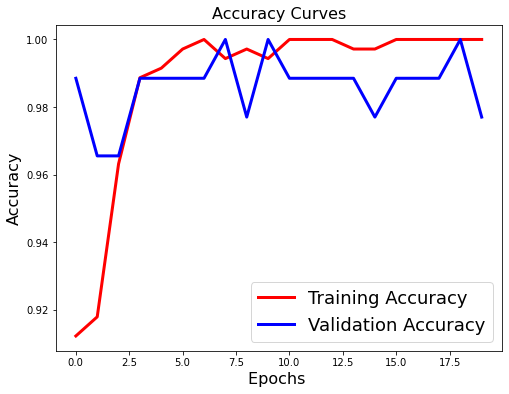

In [25]:
show_results()

In [36]:
test_score = model.evaluate(test)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

3/3 [==============================] - 7s 2s/step - loss: 0.0118 - accuracy: 0.9884
[INFO] accuracy: 98.84%
[INFO] Loss:  0.011807015165686607


3/3 [==============================] - 7s 2s/step
Confusion Matrix
Normalized confusion matrix
Classification Report
              precision    recall  f1-score   support

    computer       0.43      0.43      0.43        35
  imprimante       0.32      0.32      0.32        28
 smartphones       0.26      0.26      0.26        23

    accuracy                           0.35        86
   macro avg       0.34      0.34      0.34        86
weighted avg       0.35      0.35      0.35        86



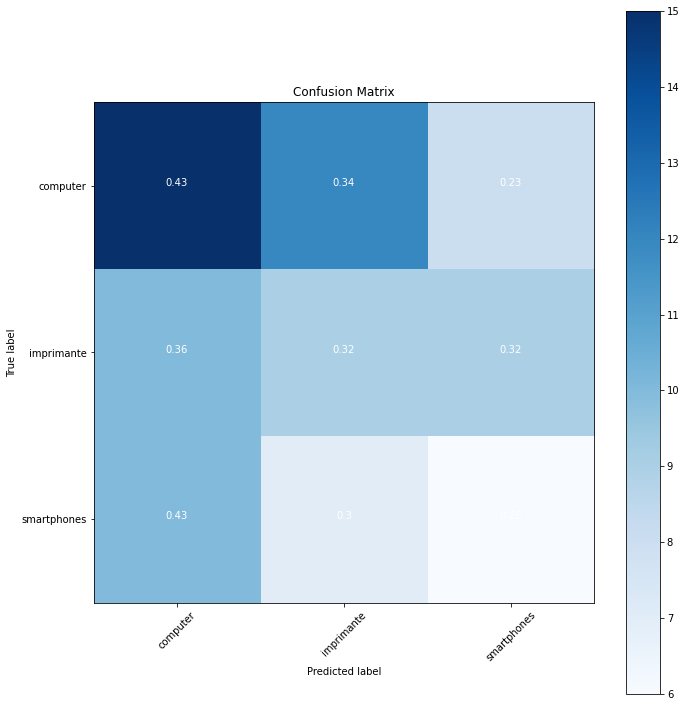

In [46]:
#Print the Target names
target_names = []
for key in train.class_indices:
    target_names.append(key)

# print(target_names)
#Confution Matrix 
Y_pred = model.predict(test)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

#Print Classification Report
print('Classification Report')
print(classification_report(test.classes, y_pred, target_names=target_names))

Resnet101v1 : loss: 0.0051 - accuracy: 1.0000


## Predictions

1/1 [==============================] - 0s 144ms/step


'computer'

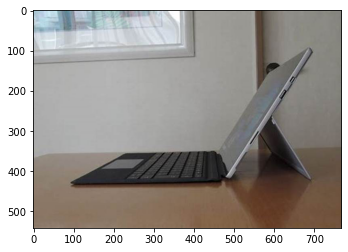

In [45]:
class_names[np.argmax(make_predictions("testset/computer/OIP (12).jpg"))]

1/1 [==============================] - 0s 151ms/step


'smartphones'

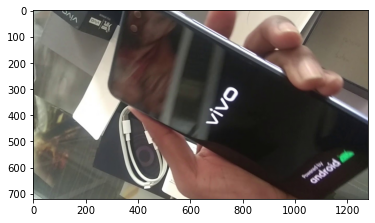

In [40]:
class_names[np.argmax(make_predictions("testset/smartphones/maxresdefault.jpg"))]

1/1 [==============================] - 0s 143ms/step


'computer'

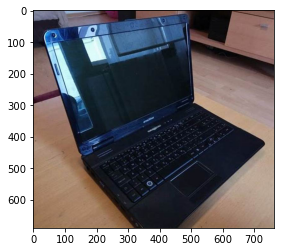

In [44]:
class_names[np.argmax(make_predictions("testset/computer/OIP (9).jpg"))]

1/1 [==============================] - 0s 150ms/step


'imprimante'

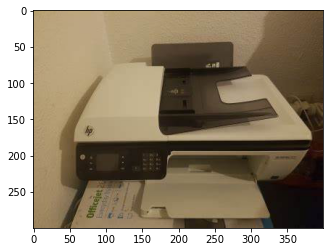

In [43]:
class_names[np.argmax(make_predictions("testset/imprimante/OIP (4).jpg"))]

## Convert TensorFlow/Keras models to TensorFlow.js

In [47]:
tfjs.converters.save_keras_model(model,"models/Resnet101")

In [48]:
#the best version until now is  Resnet101v1 : loss: 0.0051 - accuracy: 1.0000
